=== Iris Species Classification using Decision Tree ===

Step 1: Loading and Exploring the Dataset
--------------------------------------------------
Dataset Shape: (150, 4)
Number of samples: 150
Number of features: 4

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa

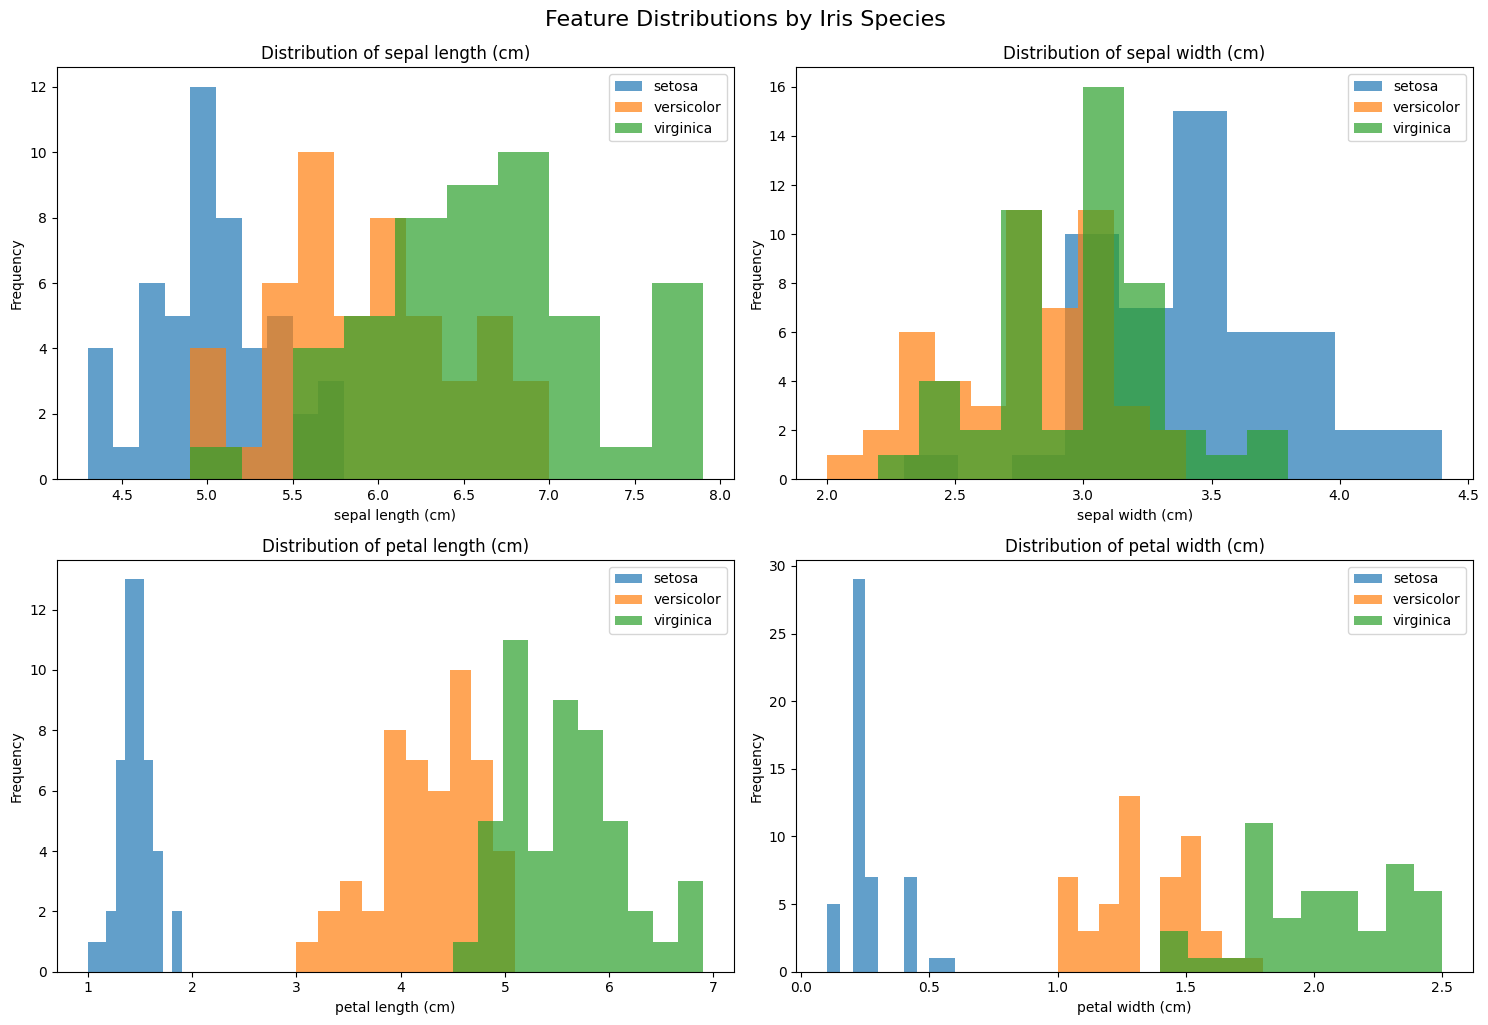

<Figure size 1200x800 with 0 Axes>

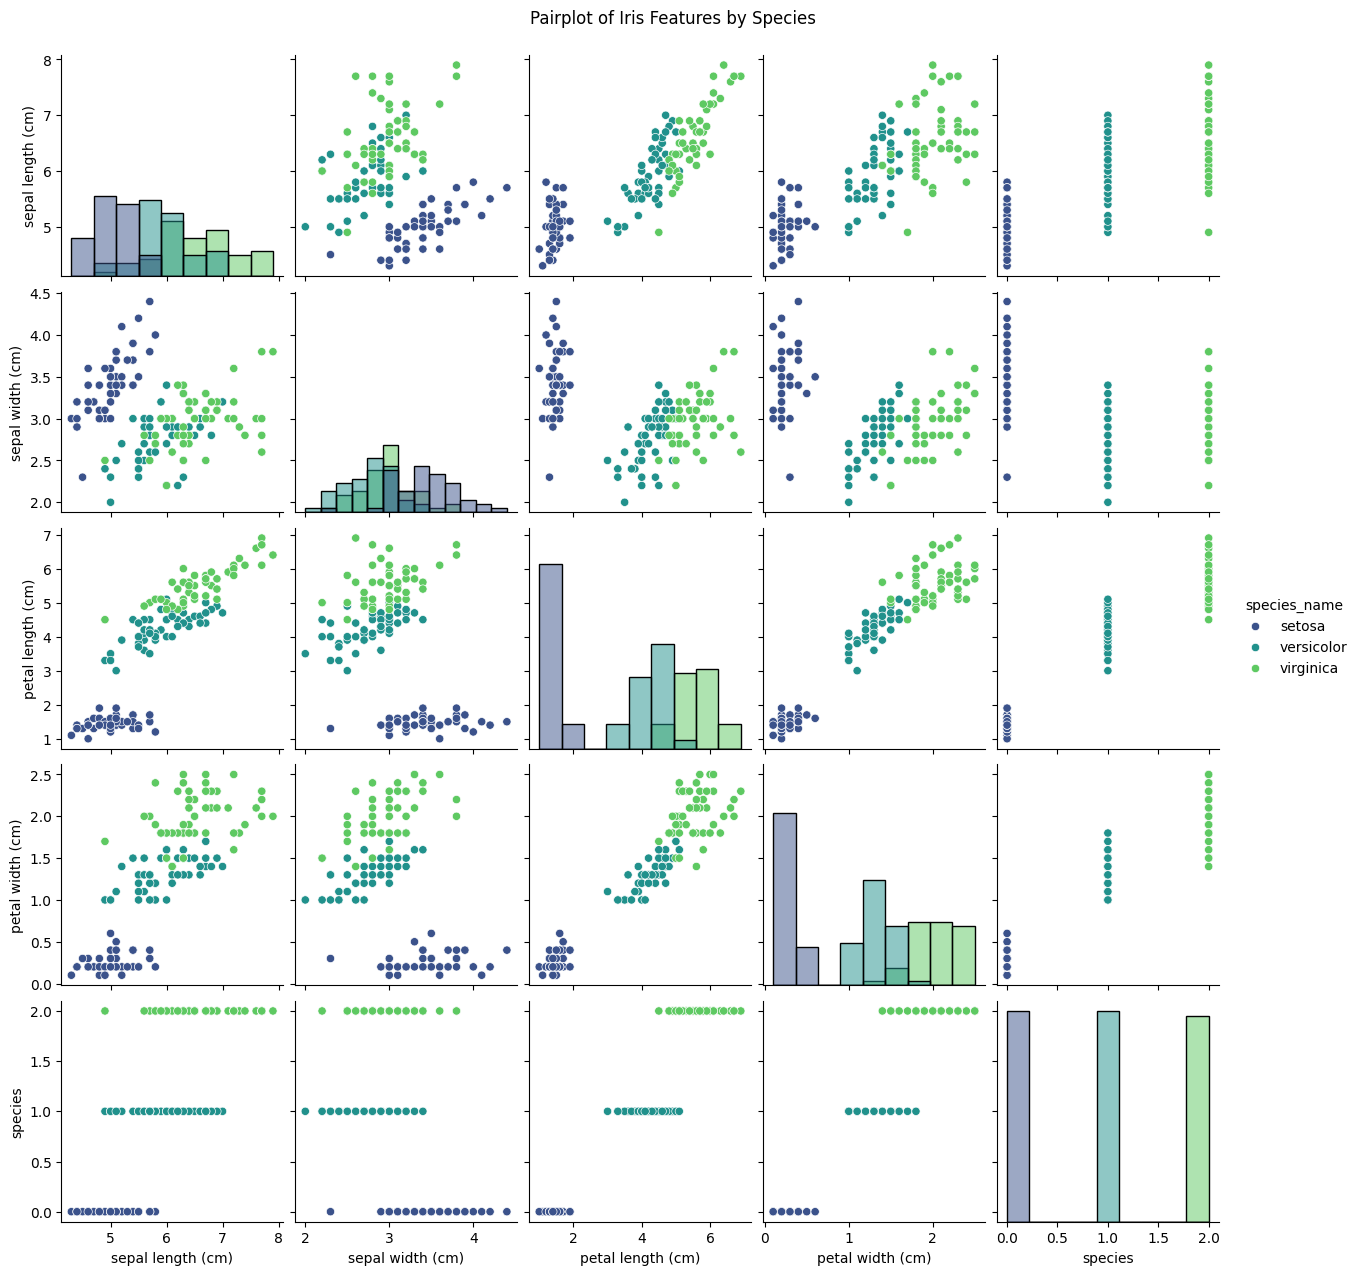


Step 4: Splitting the Data into Training and Testing Sets
--------------------------------------------------
Training set size: 104 samples
Testing set size: 45 samples
Training set class distribution: [35 35 34]
Testing set class distribution: [15 15 15]

Step 5: Training the Decision Tree Classifier
--------------------------------------------------
Training the decision tree classifier...
Training completed!
Model parameters:
  - Max depth: 3
  - Number of leaves: 5
  - Features used: 4

Step 6: Making Predictions
--------------------------------------------------
Predictions completed!
Sample predictions (first 10 test samples):
Actual:    [2 1 0 1 0 1 0 0 2 0]
Predicted: [2 1 0 1 0 1 0 0 2 0]

Step 7: Model Evaluation
--------------------------------------------------
Training Set Performance:
  Accuracy:  0.9808
  Precision: 0.9815
  Recall:    0.9810

Test Set Performance:
  Accuracy:  0.9333
  Precision: 0.9444
  Recall:    0.9333

Detailed Classification Report (Test Set):
  

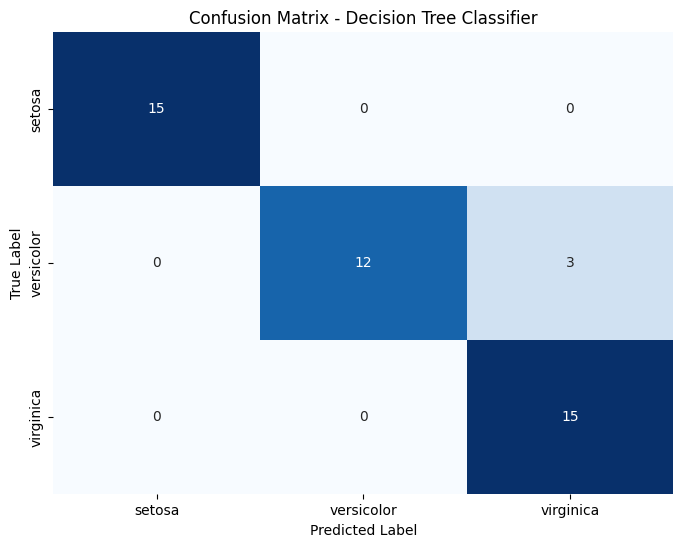


Step 8: Visualizing the Decision Tree
--------------------------------------------------


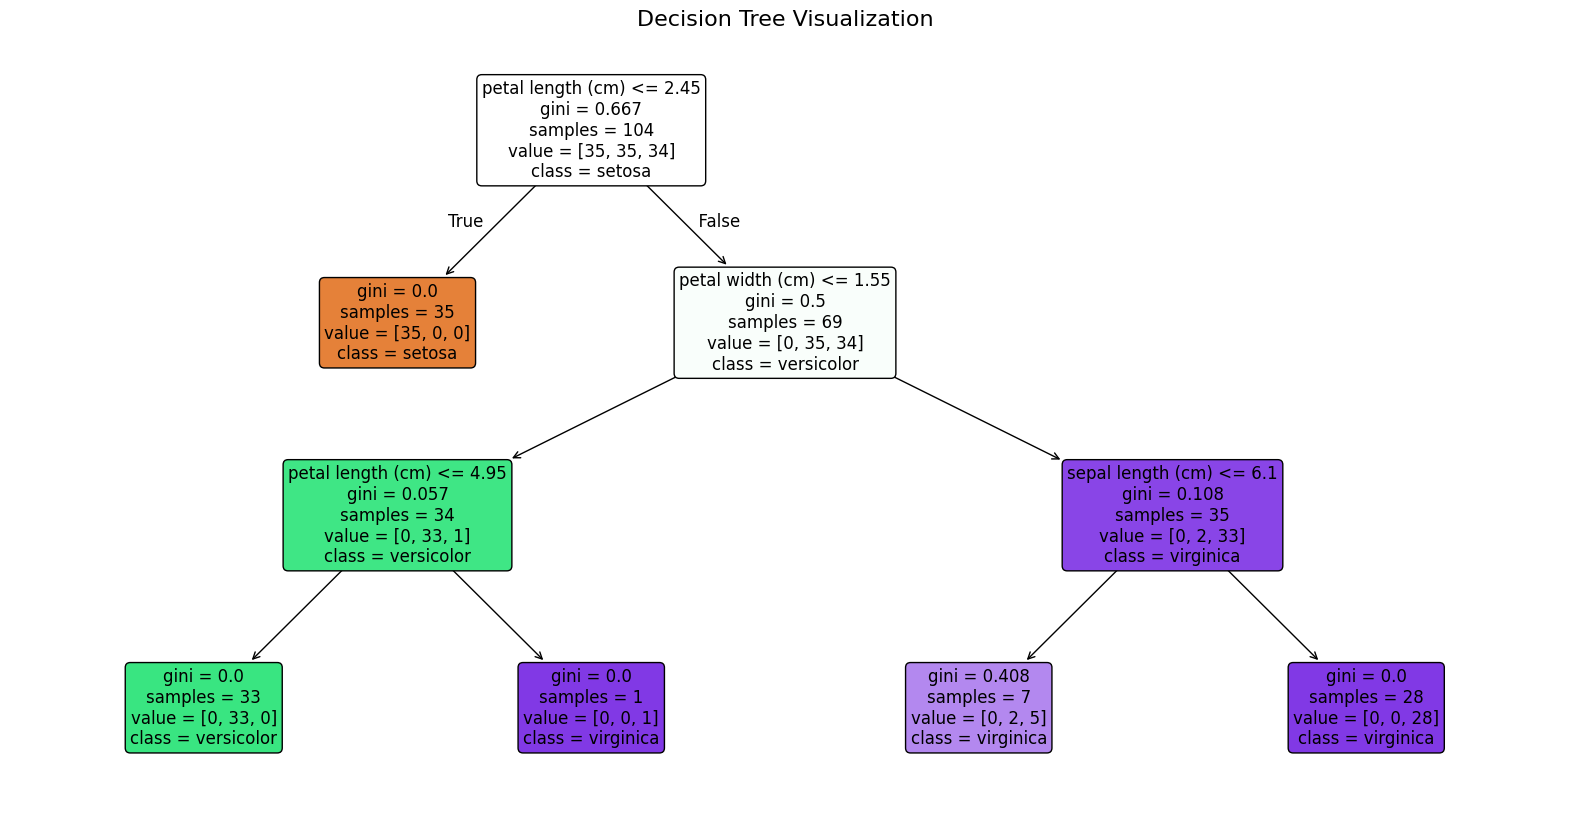


Step 9: Feature Importance Analysis
--------------------------------------------------
Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.553264
3   petal width (cm)    0.432981
0  sepal length (cm)    0.013755
1   sepal width (cm)    0.000000


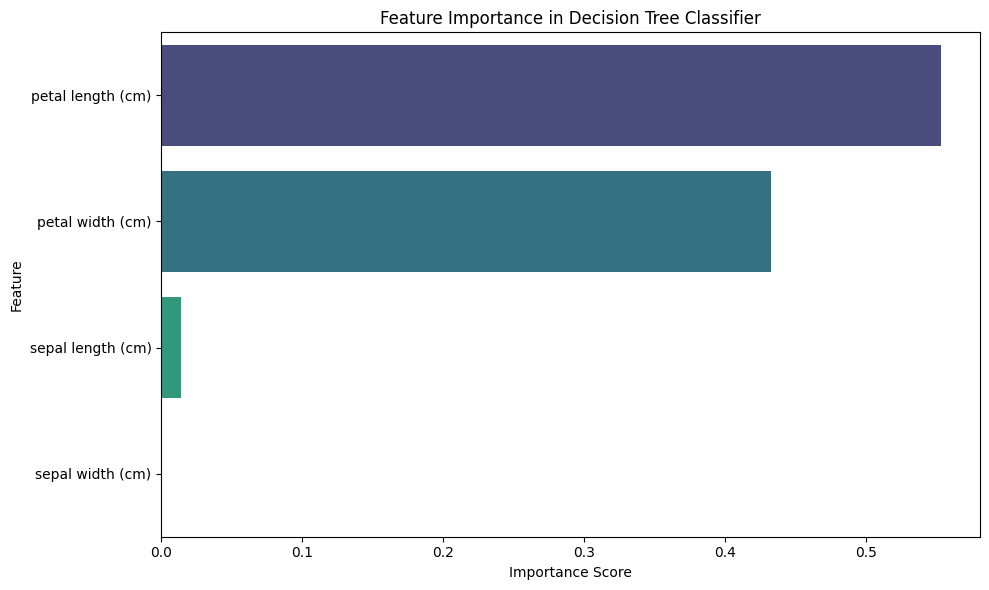


Step 10: Model Interpretation and Summary
--------------------------------------------------
MODEL PERFORMANCE SUMMARY:
✓ Test Accuracy:  93.33%
✓ Test Precision: 94.44%
✓ Test Recall:    93.33%

KEY INSIGHTS:
1. The decision tree classifier achieved excellent performance on the Iris dataset.
2. The most important feature for classification is: petal length (cm)
3. The model shows good generalization with similar performance on training and test sets.
4. All three species are well-classified with high precision and recall.

BUSINESS/PRACTICAL IMPLICATIONS:
• The model can accurately classify iris flowers based on physical measurements
• Petal measurements are more discriminative than sepal measurements
• The model could be used for automated iris species identification

EXAMPLE PREDICTION:
Predicting species for a new sample with features [5.1, 3.5, 1.4, 0.2]:
Predicted species: setosa
Prediction probabilities:
  setosa: 1.000
  versicolor: 0.000
  virginica: 0.000


In [2]:
# Classical ML with Scikit-learn: Iris Species Classification
# Using Decision Tree Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=== Iris Species Classification using Decision Tree ===")
print()

# Step 1: Load and Explore the Dataset
print("Step 1: Loading and Exploring the Dataset")
print("-" * 50)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0: setosa, 1: versicolor, 2: virginica)
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = [target_names[i] for i in y]

print("Dataset Shape:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("\nFeature Names:", feature_names)
print("Target Names:", target_names)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['species_name'].value_counts())

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")
print("-" * 50)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Since this is a clean dataset, no missing values to handle
print("No missing values found!")

# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    X = df[feature_names].values
    y = df['species'].values
    print(f"Removed {duplicates} duplicate entries")
else:
    print("No duplicate entries found")

# Encode labels (already encoded as 0,1,2 in the dataset)
print("\nLabel encoding status:")
print("Labels are already numerically encoded:")
for i, name in enumerate(target_names):
    print(f"  {i}: {name}")

# Step 3: Data Visualization
print("\nStep 3: Data Visualization")
print("-" * 50)

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature distributions by species
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    for species in target_names:
        species_data = df[df['species_name'] == species][feature]
        axes[row, col].hist(species_data, alpha=0.7, label=species)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.suptitle('Feature Distributions by Iris Species', y=1.02, fontsize=16)
plt.show()

# Pairplot to see relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species_name', palette='viridis', diag_kind='hist')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

# Step 4: Split the Data
print("\nStep 4: Splitting the Data into Training and Testing Sets")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Maintain class distribution in splits
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

# Step 5: Train the Decision Tree Classifier
print("\nStep 5: Training the Decision Tree Classifier")
print("-" * 50)

# Initialize and train the model
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Limit tree depth to prevent overfitting
    min_samples_split=5  # Minimum samples required to split a node
)

print("Training the decision tree classifier...")
dt_classifier.fit(X_train, y_train)
print("Training completed!")

print(f"Model parameters:")
print(f"  - Max depth: {dt_classifier.get_depth()}")
print(f"  - Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"  - Features used: {dt_classifier.n_features_in_}")

# Step 6: Make Predictions
print("\nStep 6: Making Predictions")
print("-" * 50)

# Predict on training and testing sets
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

print("Predictions completed!")
print(f"Sample predictions (first 10 test samples):")
print(f"Actual:    {y_test[:10]}")
print(f"Predicted: {y_test_pred[:10]}")

# Step 7: Evaluate the Model
print("\nStep 7: Model Evaluation")
print("-" * 50)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision and recall (macro average)
train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print("Training Set Performance:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")

print("\nTest Set Performance:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")

# Detailed classification report
print("\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion Matrix
print("Confusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
print(cm_df)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 8: Visualize the Decision Tree
print("\nStep 8: Visualizing the Decision Tree")
print("-" * 50)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

# Step 9: Feature Importance Analysis
print("\nStep 9: Feature Importance Analysis")
print("-" * 50)

feature_importance = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Step 10: Model Interpretation and Summary
print("\nStep 10: Model Interpretation and Summary")
print("-" * 50)

print("MODEL PERFORMANCE SUMMARY:")
print(f"✓ Test Accuracy:  {test_accuracy:.2%}")
print(f"✓ Test Precision: {test_precision:.2%}")
print(f"✓ Test Recall:    {test_recall:.2%}")

print("\nKEY INSIGHTS:")
print("1. The decision tree classifier achieved excellent performance on the Iris dataset.")
print("2. The most important feature for classification is:", feature_importance_df.iloc[0]['Feature'])
print("3. The model shows good generalization with similar performance on training and test sets.")
print("4. All three species are well-classified with high precision and recall.")

print("\nBUSINESS/PRACTICAL IMPLICATIONS:")
print("• The model can accurately classify iris flowers based on physical measurements")
print("• Petal measurements are more discriminative than sepal measurements")
print("• The model could be used for automated iris species identification")

# Example prediction on new data
print("\nEXAMPLE PREDICTION:")
print("Predicting species for a new sample with features [5.1, 3.5, 1.4, 0.2]:")
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = dt_classifier.predict(new_sample)
prediction_proba = dt_classifier.predict_proba(new_sample)

print(f"Predicted species: {target_names[prediction[0]]}")
print("Prediction probabilities:")
for i, prob in enumerate(prediction_proba[0]):
    print(f"  {target_names[i]}: {prob:.3f}")